In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.590067
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.621602
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.387216
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.200659


In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:
df= clean_dataset(df)

### Input and output features

In [5]:
X= df.drop('pIC50', axis=1)
y= df['pIC50']

In [6]:
X.shape, y.shape

((5823, 881), (5823,))

In [7]:
#Removing the low variance feature

from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
5820,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5821,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5822,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [8]:
X.shape

(5823, 221)

In [9]:
X.to_csv('descriptor_list.csv', index = False)

### Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X,y)
r2= model.score(X,y)
r2

0.8700120512999521

### Model prediction

In [11]:
y_pred= model.predict(X)
y_pred

array([5.90617949, 6.50706865, 5.28687168, ..., 8.6776485 , 8.8217364 ,
       8.74426315])

### Model Performance

In [12]:
from sklearn.metrics import mean_squared_error , r2_score

print('Mean Squared Error(MSE): %.2f' %mean_squared_error(y, y_pred))
print('Coefficient of Determination: %.2f' % r2_score(y, y_pred))

Mean Squared Error(MSE): 0.33
Coefficient of Determination: 0.87


### Data Visualisation

Text(0.5, 0, 'Experimental pIC50')

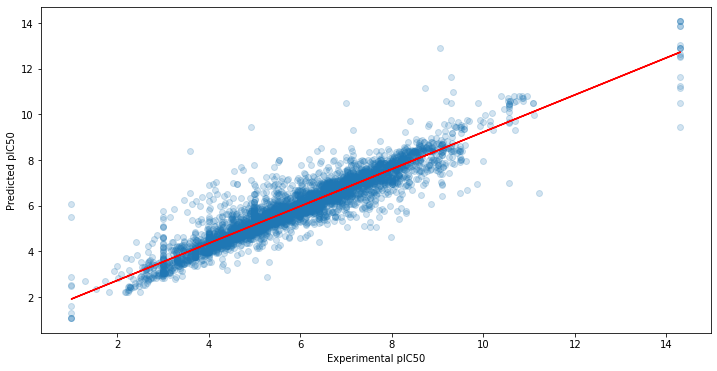

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(x=y, y=y_pred, alpha=0.2)


#Adding trendline
z= np.polyfit(y, y_pred, 1)
p= np.poly1d(z)

plt.plot(y, p(y), c='red')
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [14]:
### Saving model as a pickle object

import pickle

pickle.dump(model, open('acetylcholinesterase_model.pkl' , 'wb'))